## Домашнее задание "Случайные марковские процессы"

Задание:
-Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов
-Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
!pip install pymorphy2
!pip install pymystem3
!pip install hmmlearn

     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 8.2MB 14.1MB/s 
     |████████████████████████████████| 378kB 4.6MB/s 


In [2]:
from google.colab import files
uploaded = files.upload()

Saving tom_2.txt to tom_2.txt


In [3]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
from hmmlearn.hmm import GaussianHMM
import warnings
%matplotlib inline
sns.set()

In [4]:
just_text=''
with open('tom_2.txt', 'r') as f:
    just_text+=f.read().lower()

In [ ]:
Оставим только пробелы и буквы

In [5]:
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [6]:
text = words_only(just_text)

Лемматизируем текст

In [7]:
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [8]:
text_lemma=lemmatize(text)


Матрица переходных вероятностей

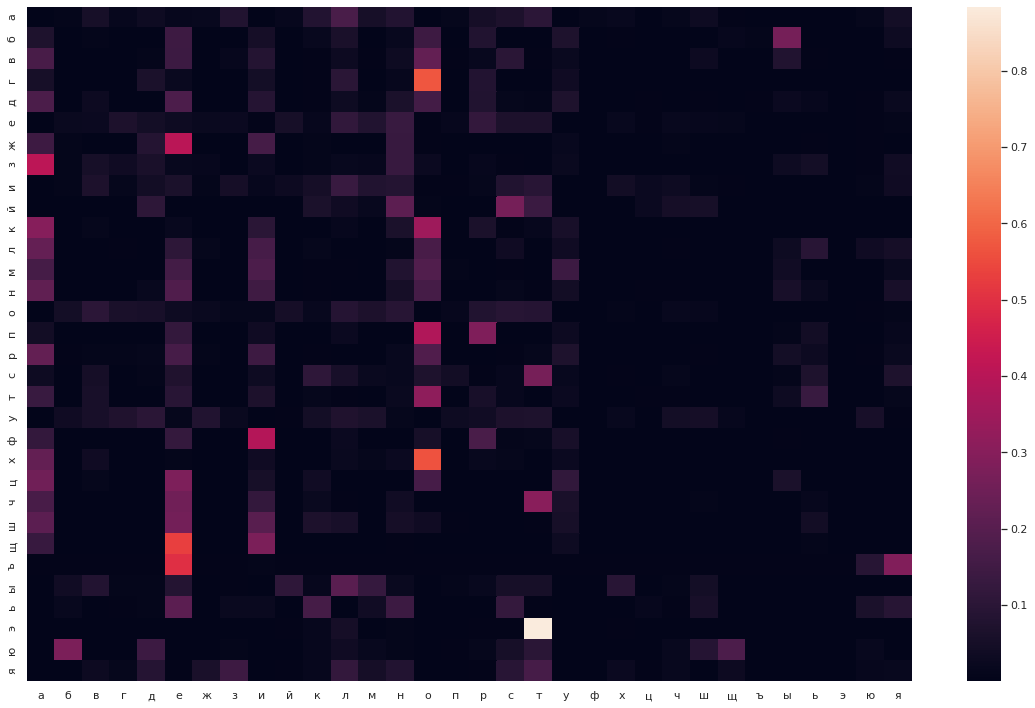

In [9]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'

POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.ones((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    if (cp!=' ') and (cn!=' '):
        probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
    

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(16,10))
sns.heatmap(df, xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.show()

Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [10]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
proba_sum = 0.
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        proba_sum += proba

In [11]:
proba_sum

0.0011975370164643182

Вероятность не велика 

Генерируем слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [12]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бойтосядл



Оценка ряда через HMM. Пробуем строить (через среднее каждой компоненты) наивный прогноз ряда

In [15]:
from google.colab import files
uploaded = files.upload()

Saving daily-total-female-births-in-cal.csv to daily-total-female-births-in-cal.csv


In [16]:
series = pd.read_csv('daily-total-female-births-in-cal.csv',sep=',').iloc[:,1]

In [17]:
values = series.values.reshape(-1,1)

In [18]:
X_train = values[:150]
X_test = values[150:]

In [19]:
for n in range(1, 30):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(X_train)
    print (n, model.score(X_train))

1 -507.620698033858
2 -504.72884949910963
3 -501.4292441896751
4 -490.1919861024244
5 -475.42343077134365
6 -469.1827046205539
7 -463.76201904694625
8 -457.7033029184346
9 -452.10344481824643
10 -442.97155422477374


Fitting a model with 167 free scalar parameters with only 150 data points will result in a degenerate solution.


11 -440.8240805063966


Fitting a model with 194 free scalar parameters with only 150 data points will result in a degenerate solution.


12 -396.6615253792125


Fitting a model with 223 free scalar parameters with only 150 data points will result in a degenerate solution.


13 -426.9457705835671


Fitting a model with 254 free scalar parameters with only 150 data points will result in a degenerate solution.


14 -420.47140431625064


Fitting a model with 287 free scalar parameters with only 150 data points will result in a degenerate solution.


15 -413.24141183023767


Fitting a model with 322 free scalar parameters with only 150 data points will result in a degenerate solution.


16 -399.7448517543331


Fitting a model with 359 free scalar parameters with only 150 data points will result in a degenerate solution.


17 -392.5744823750855


Fitting a model with 398 free scalar parameters with only 150 data points will result in a degenerate solution.


18 -360.84945496966327


Fitting a model with 439 free scalar parameters with only 150 data points will result in a degenerate solution.


19 -373.9693939783442


Fitting a model with 482 free scalar parameters with only 150 data points will result in a degenerate solution.


20 -372.4555310250023


Fitting a model with 527 free scalar parameters with only 150 data points will result in a degenerate solution.


21 -361.4511912547972


Fitting a model with 574 free scalar parameters with only 150 data points will result in a degenerate solution.


22 -321.2228421232267


Fitting a model with 623 free scalar parameters with only 150 data points will result in a degenerate solution.


23 -282.757220197792


Fitting a model with 674 free scalar parameters with only 150 data points will result in a degenerate solution.


24 -343.69142222561305


Fitting a model with 727 free scalar parameters with only 150 data points will result in a degenerate solution.


25 -339.0818879320016


Fitting a model with 782 free scalar parameters with only 150 data points will result in a degenerate solution.


26 -259.7607449505903


Fitting a model with 839 free scalar parameters with only 150 data points will result in a degenerate solution.


27 -327.05740604962955


Fitting a model with 898 free scalar parameters with only 150 data points will result in a degenerate solution.


28 -307.08116502073614
29 -310.389046705692


In [20]:
model = GaussianHMM(n_components=24,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(X_train)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

Fitting a model with 623 free scalar parameters with only 150 data points will result in a degenerate solution.


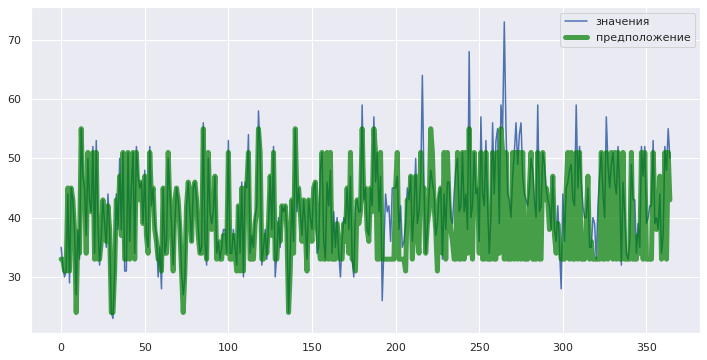

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(values,label='значения')
plt.plot(means, linewidth=5, alpha=0.7, color='green',label='предположение')
plt.legend()
plt.show()